In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

[[  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
1.0
[0.]
[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[1. 0. 0. 1. 0.]]


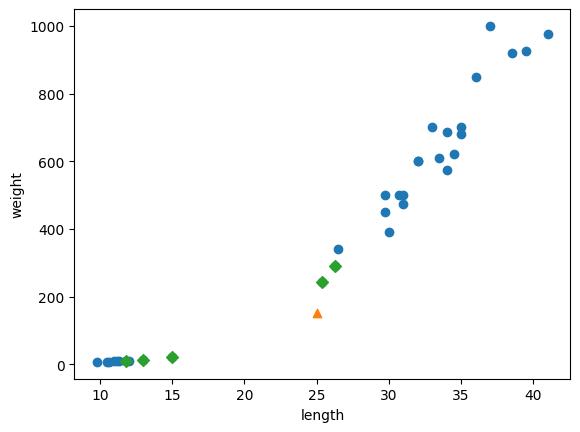

In [38]:
# 데이터 로드
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# fish_data = [[l, w] for l, w in zip(length, weight)] # 특성
# fish_target = [1] * 35 + [0] * 14 # 레이블
fish_data = np.column_stack((length, weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 도미: 1, 빙어: 0

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size=0.3, random_state=42)
print(train_input)

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))
print(kn.predict([[25, 150]]))

distances, indexes = kn.kneighbors([[25, 150]]) # [25, 150]의 이웃샘플
print(distances)
print(train_target[indexes])

# 시각화, 분석
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[ 25.97941176 418.77058824] [ 10.47323702 330.82359217]


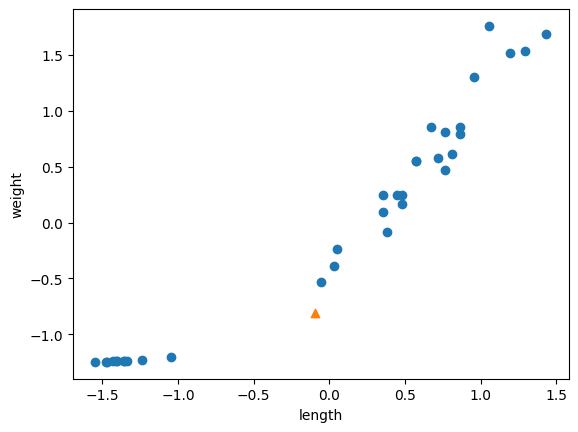

1.0
[1.]


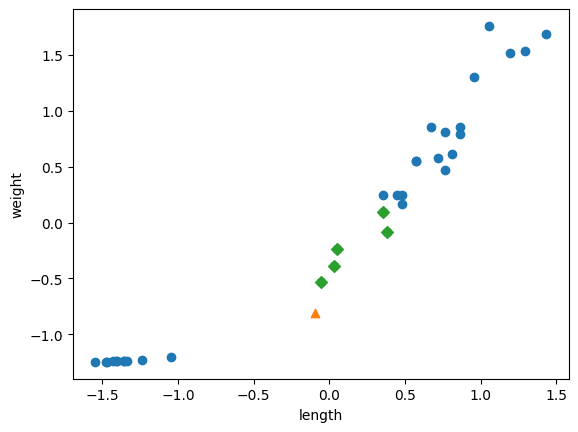

In [39]:
# scale 조정
mean = np.mean(train_input, axis=0) # 평균 axis=0은 행에 따라 열의 통계 값 계산
std = np.std(train_input, axis=0) # 표준편차
print(mean, std)

train_scaled = (train_input - mean) / std # 표준점수 계산
test_scaled = (test_input - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
# plt.scatter(25, 150, marker="^")
new = ([25, 150] - mean) / std
plt.scatter(new[0], new[1], marker="^")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()
 
kn.fit(train_scaled, train_target)
print(kn.score(test_scaled, test_target))
print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
new = ([25, 150] - mean) / std
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
# 결정계수
knr = KNeighborsRegressor()
knr.fit(train_scaled, train_target)
print(f'테스트세트 점수: {knr.score(test_scaled, test_target)}')

test_prediction = knr.predict(test_scaled)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

테스트세트 점수: 1.0
0.0
